In [190]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [178]:
df_songs = pd.read_csv('songs-dataset.csv')

array([[<AxesSubplot:title={'center':'Index'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Beats Per Minute (BPM)'}>],
       [<AxesSubplot:title={'center':'Energy'}>,
        <AxesSubplot:title={'center':'Danceability'}>,
        <AxesSubplot:title={'center':'Loudness (dB)'}>],
       [<AxesSubplot:title={'center':'Liveness'}>,
        <AxesSubplot:title={'center':'Valence'}>,
        <AxesSubplot:title={'center':'Acousticness'}>],
       [<AxesSubplot:title={'center':'Speechiness'}>,
        <AxesSubplot:title={'center':'Popularity'}>, <AxesSubplot:>]],
      dtype=object)

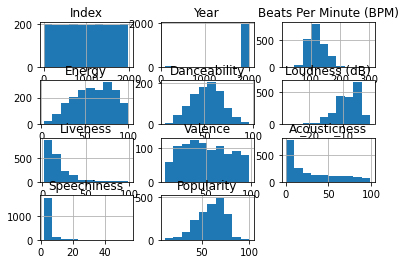

In [180]:
df_songs.hist()

In [181]:
df_songs['Month'] = df_songs['Month'].replace(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])


In [182]:
df_songs = df_songs.dropna(subset=['Length (Duration)'])

# df_songs = df_songs.astype({'Length (Duration)': int})

In [183]:
df_songs.isnull().sum(axis=0).tolist()

[0, 1, 3, 3, 4, 0, 3, 4, 1015, 3, 1, 1026, 0, 3, 0, 2]

In [184]:
df_songs['Length (Duration)'] = df_songs['Length (Duration)'].str.replace(',','').astype(int)

In [185]:
df_songs = df_songs.fillna({'Title': 'Unknown', 'Artist': 'Unknown','Top Genre': 'unknown', 'Year': 1993.0, 'Beats Per Minute (BPM)': 119.0,
                    'Energy': 61.0, 'Danceability': 53.0, 'Loudness (dB)': -8.0, 'Liveness': 12.0, 'Valence': 49.0, 'Length (Duration)': 245.0, 'Acousticness': 18.0, 'Speechiness': 4.0, 'Popularity': 62.0})

In [186]:
df_songs = df_songs.astype({'Year': int, 'Month': int, 'Beats Per Minute (BPM)': int, 'Energy': int, 'Danceability': int, 'Loudness (dB)': int, 'Liveness': int, 'Valence': int, 'Length (Duration)': int, 'Acousticness': int, 'Speechiness': int, 'Popularity': int})

In [187]:
df_songs.describe(include='all')

,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,1985.000000,1985,1985,1985,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
unique,NaN,1949,729,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Feeling Good,Queen,album rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,37,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,996.543577,NaN,NaN,NaN,1959.507305,6.519395,120.236272,59.643829,52.991940,-9.015113,19.015617,49.859950,262.612594,28.911335,4.990932,59.515869
std,576.313918,NaN,NaN,NaN,250.775489,3.421904,28.623795,22.155030,10.780758,3.649289,16.741640,17.350442,93.749643,29.022450,4.406959,14.366701
min,1.000000,NaN,NaN,NaN,92.000000,1.000000,15.000000,3.000000,10.000000,-27.000000,2.000000,5.000000,93.000000,0.000000,2.000000,11.000000
25%,497.000000,NaN,NaN,NaN,1978.000000,4.000000,99.000000,42.000000,53.000000,-11.000000,9.000000,49.000000,212.000000,3.000000,3.000000,49.000000
50%,995.000000,NaN,NaN,NaN,1993.000000,7.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,49.000000,245.000000,18.000000,4.000000,62.000000
75%,1496.000000,NaN,NaN,NaN,2007.000000,9.000000,136.000000,78.000000,53.000000,-6.000000,23.000000,49.000000,290.000000,50.000000,5.000000,71.000000


In [188]:
df_songs.Year = df_songs.Year.replace([92], 1992)

In [189]:
df_songs = df_songs[df_songs['Length (Duration)'] < 700]

{'whiskers': [<matplotlib.lines.Line2D at 0x1deba1d9a30>,
 'caps': [<matplotlib.lines.Line2D at 0x1deba1d9fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1deba1d9760>],
 'medians': [<matplotlib.lines.Line2D at 0x1deba1e75b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1deba1e7880>],
 'means': []}

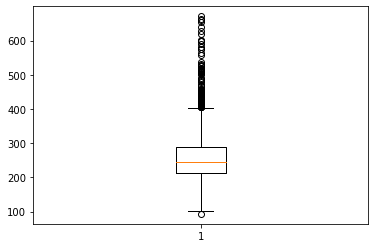

In [192]:
plt.boxplot(df_songs['Length (Duration)'])

In [193]:
df_songs = df_songs[df_songs['Beats Per Minute (BPM)'] < 210]

In [194]:
df_songs['Date'] = pd.to_datetime(df_songs[['Year', 'Month']].assign(DAY=1))

In [195]:
def from_dob_to_age(born):
    today = pd.to_datetime('now')
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [196]:
df_songs['Age'] = df_songs['Date'].apply(lambda x: from_dob_to_age(x))

c:\Users\Beth Vander Hoek\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


In [197]:
df_songs.head(1)

,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Date,Age
0,1,Sunrise,Norah Jones,adult standards,2004,10,157,30,53,-14,11,68,201,94,3,71,2004-10-01,17


In [198]:
df_songs = df_songs.drop(columns=(['Year', 'Month', 'Date']))

This is the second exercise: Model Training

In [199]:
x = df_songs.copy()
x = x.drop(columns=(['Popularity']))

In [200]:
y = df_songs.copy()
y = y[['Popularity']]
y.head(1)

,Popularity
0,71


In [201]:
from sklearn.model_selection import train_test_split

In [202]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=17)

In [203]:
x_train.describe()

,Index,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Age
count,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000
mean,1000.133237,120.083997,59.501810,53.149891,-9.002896,19.151340,49.574946,260.059377,29.832730,4.915279,29.033309
std,574.608389,27.568916,22.191741,10.641319,3.635373,17.117399,17.338436,76.195150,29.520791,4.078850,16.073168
min,2.000000,15.000000,4.000000,10.000000,-27.000000,2.000000,5.000000,119.000000,0.000000,2.000000,2.000000
25%,504.000000,100.000000,42.000000,53.000000,-11.000000,9.000000,49.000000,213.000000,3.000000,3.000000,15.000000
50%,1014.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,49.000000,246.000000,19.000000,4.000000,29.000000
75%,1490.000000,136.000000,77.000000,53.000000,-6.000000,23.000000,49.000000,289.000000,52.000000,5.000000,43.000000
max,1994.000000,204.000000,100.000000,96.000000,-2.000000,99.000000,98.000000,671.000000,99.000000,46.000000,66.000000


In [204]:
x_test.describe()

,Index,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Age
count,592.000000,592.000000,592.000000,592.00000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,985.302365,119.986486,60.148649,52.83277,-8.984797,18.592905,50.722973,256.331081,26.802365,5.170608,27.790541
std,581.194366,29.245038,22.024249,10.93578,3.660939,15.728712,17.273777,73.467226,27.848329,5.118522,16.077437
min,1.000000,18.000000,3.000000,18.00000,-24.000000,3.000000,6.000000,93.000000,0.000000,2.000000,2.000000
25%,473.500000,98.000000,44.000000,52.00000,-11.000000,9.000000,49.000000,209.750000,3.000000,3.000000,14.000000
50%,958.000000,119.000000,61.000000,53.00000,-8.000000,12.000000,49.000000,244.000000,15.000000,4.000000,27.000000
75%,1511.250000,136.250000,78.000000,53.00000,-6.000000,23.000000,52.250000,288.000000,46.000000,5.000000,42.000000
max,1991.000000,206.000000,99.000000,95.00000,-2.000000,99.000000,98.000000,598.000000,98.000000,55.000000,64.000000
